In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('lines', markersize=3)

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

mpl.rc('font', **font)

%matplotlib inline

In [2]:
def myplot_raw(df, comment, ax):
    angle, counts = df["angle [deg]"].to_numpy(), df["counting rate [cps]"].to_numpy()
    plot = ax.plot(angle, counts)
    ax.set_xlabel('Angle (Degrees)')
    ax.set_ylabel('counts/sec')
    ax.set_title(f"X-Ray Diffraction {comment}")
    ax.set_xlim(min(angle),max(angle))
    ax.grid(True)
    # ax.set_xticks(np.linspace(min(angle), max(angle), 10));


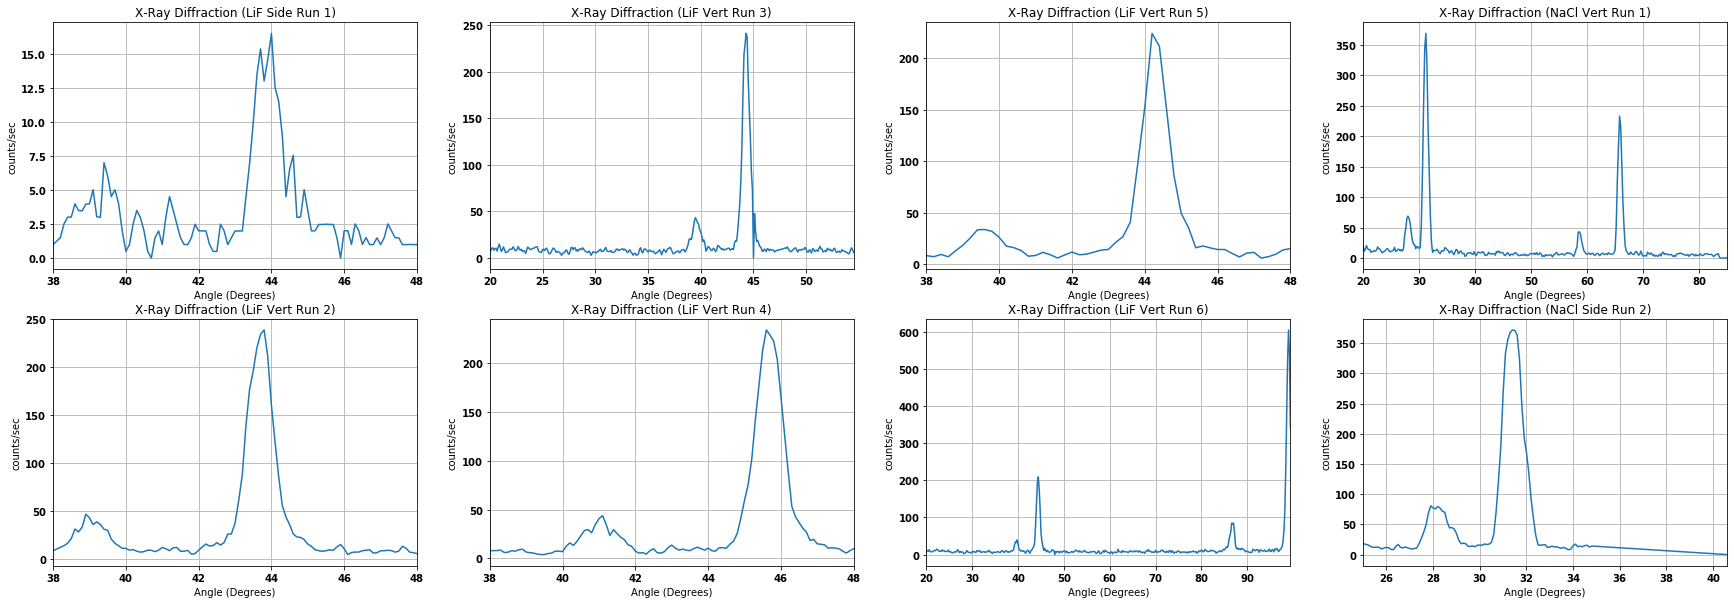

In [3]:
fig, axs = plt.subplots(2, 4, figsize=(30,10))

lifSide1 = pd.read_csv('run1_lif_side.txt', delimiter='\t')
myplot_raw(lifSide1, "(LiF Side Run 1)", axs[0,0])

lifVert2 = pd.read_csv('run2_lif_vert.txt', delimiter='\t')
myplot_raw(lifVert2, "(LiF Vert Run 2)", axs[1,0])

lifVert3 = pd.read_csv('run3_lif_vert.txt', delimiter='\t')
myplot_raw(lifVert3, "(LiF Vert Run 3)", axs[0,1])

lifVert4 = pd.read_csv('run4_lif_vert.txt', delimiter='\t')
myplot_raw(lifVert4, "(LiF Vert Run 4)", axs[1,1])

lifVert5 = pd.read_csv('run5_lif_vert.txt', delimiter='\t')
myplot_raw(lifVert5, "(LiF Vert Run 5)", axs[0,2])

lifVert6 = pd.read_csv('run6_lif_vert.txt', delimiter='\t')
myplot_raw(lifVert6, "(LiF Vert Run 6)", axs[1,2])

naclVert1 = pd.read_csv('run1_nacl_vert.txt', delimiter='\t')
myplot_raw(naclVert1, "(NaCl Vert Run 1)", axs[0,3])

naclVert2 = pd.read_csv('run2_nacl_vert.txt', delimiter='\t')
myplot_raw(naclVert2, "(NaCl Side Run 2)", axs[1,3])


In [4]:
from scipy.optimize import curve_fit

def myplot_gaus(df, comment, ax, parDict, IC=[1, 1, 1]):
    angle, counts = df["angle [deg]"].to_numpy(), df["counting rate [cps]"].to_numpy()
    def gaus(x, A, mu, sig):
        return A*np.exp(-(mu-x)**2/(2*sig**2))
    def gaus2(x, A1, A2, mu1, mu2, sig1, sig2, cons):
        return gaus(x, A1, mu1, sig1) + gaus(x, A2, mu2, sig2) + cons
    def gaus4(x, A1, A2, A3, A4, mu1, mu2, mu3, mu4, sig1, sig2, sig3, sig4, cons):
        return gaus(x, A1, mu1, sig1) + gaus(x, A2, mu2, sig2) + gaus(x, A3, mu3, sig3) + gaus(x, A4, mu4, sig4) + cons
    

    plot = ax.plot(angle, counts)
    if len(IC)/3 == 2:
        pars, cov = curve_fit(gaus2, angle, counts, p0=IC+[0])#, bounds=([0.75*k for k in IC]+[0], [1.5*k for k in IC]+[100]))
        ax.plot(angle, gaus2(angle, *pars))
    elif len(IC)/3 == 4:
        pars, cov = curve_fit(gaus4, angle, counts, p0=IC+[0])#, bounds=([0.75*k for k in IC]+[0], [1.5*k for k in IC]+[100]))
        ax.plot(angle, gaus4(angle, *pars))
    parDict[comment] = pars
    ax.set_xlabel('Angle (Degrees)')
    ax.set_ylabel('counts/sec')
    ax.set_title(f"X-Ray Diffraction {comment}")
    ax.set_xlim(min(angle),max(angle))
    ax.grid(True)
    ax.legend(["Data", "Fit"])
    # ax.set_xticks(np.linspace(min(angle), max(angle), 10));

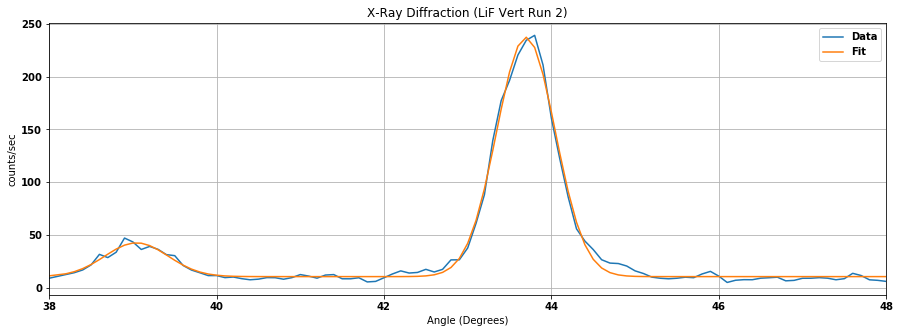

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(15,5))
myplot_gaus(lifVert2, "(LiF Vert Run 2)", axs, {}, IC=[50, 250, 39, 43.75, .5, .5])



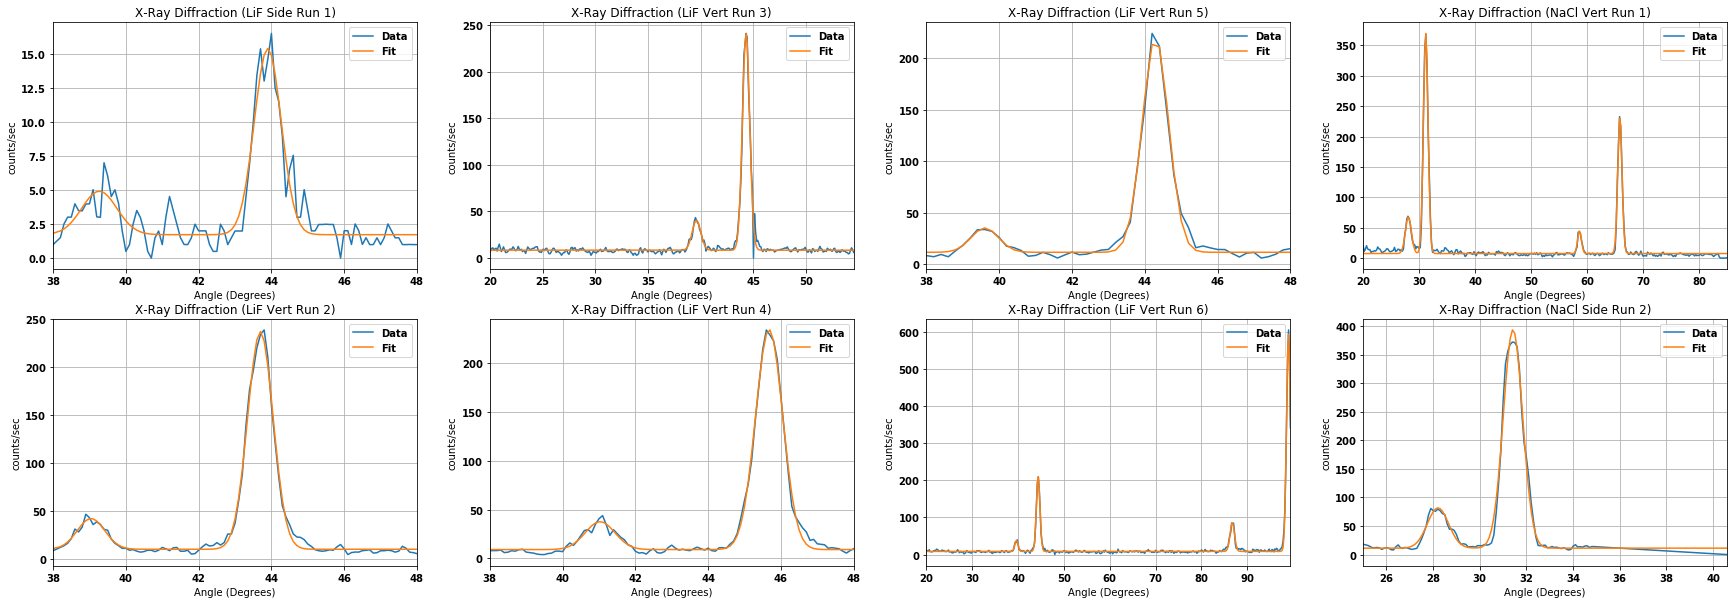

In [7]:
fig, axs = plt.subplots(2, 4, figsize=(30,10))
parDict={}
myplot_gaus(lifSide1, "(LiF Side Run 1)", axs[0,0], parDict, IC=[7, 15, 39.5, 44, .6, .5])
myplot_gaus(lifVert2, "(LiF Vert Run 2)", axs[1,0], parDict, IC=[50, 250, 39, 43.75, .5, .5])
myplot_gaus(lifVert3, "(LiF Vert Run 3)", axs[0,1], parDict, IC=[50, 250, 39.5, 43.75, .5, .5])
myplot_gaus(lifVert4, "(LiF Vert Run 4)", axs[1,1], parDict, IC=[50, 225, 41, 45.75, .5, .5])
myplot_gaus(lifVert5, "(LiF Vert Run 5)", axs[0,2], parDict, IC=[30, 225, 39.75, 44.2, .5, .5])
myplot_gaus(lifVert6, "(LiF Vert Run 6)", axs[1,2], parDict, IC=[50, 200, 100, 600, 39.5, 44, 86.5, 100, .5, .5, .5, 1])
myplot_gaus(naclVert1, "(NaCl Vert Run 1)", axs[0,3], parDict, IC=[75, 360, 50, 240, 28, 31.5, 58.5, 66, .5, .5, .5, .5])
myplot_gaus(naclVert2, "(NaCl Side Run 2)", axs[1,3], parDict, IC=[75, 360, 28.5, 31.5, 0.6, 0.5])

In [10]:
from pprint import pprint 
pprint(parDict)

{'(LiF Side Run 1)': array([ 3.19776773, 13.69394671, 39.27021761, 43.89939066,  0.483458  ,
        0.37105344,  1.71982898]),
 '(LiF Vert Run 2)': array([ 32.00348691, 226.69333975,  39.04297493,  43.69635385,
         0.3784819 ,   0.35049302,  10.50171164]),
 '(LiF Vert Run 3)': array([ 32.05474949, 232.5170499 ,  39.59651778,  44.29695631,
         0.40674811,   0.3445133 ,   8.43437853]),
 '(LiF Vert Run 4)': array([ 28.44343479, 224.62067032,  41.03141594,  45.67727278,
         0.40725053,   0.37428711,   9.12463995]),
 '(LiF Vert Run 5)': array([ 23.69579851, 208.9422051 ,  39.60371827,  44.29262119,
         0.37565709,   0.36146801,  11.33744089]),
 '(LiF Vert Run 6)': array([2.94803800e+01, 2.01498464e+02, 7.72375844e+01, 5.85121479e+02,
       3.96341928e+01, 4.43703776e+01, 8.67263114e+01, 9.89801023e+01,
       3.64887013e-01, 3.91179938e-01, 4.88424601e-01, 4.19406968e-01,
       8.53930643e+00]),
 '(NaCl Side Run 2)': array([ 70.57693547, 382.47794031,  28.20737905,  3